## PEI Civil Service Union Pay Scale

Using the data from [OD0052 Civil Service Union Pay Scale](https://data.princeedwardisland.ca/Government-and-Economy/OD0052-Civil-Service-Union-Pay-Scale/n86j-68si) we aim to mimic the visualizations featured on the open data hub.

From the Open Data Portal:

>Reports by Job classification the most current hourly rate of pay for each step in the classification level. Salary Plan indicates those classifications in the UPSE Civil agreement which have a 7.5 hour work day and those with 8.0 hour days.
For agreements which have expired, the last rate increase will remain in effect until a new agreement is negotiated.

In [1]:
%matplotlib inline
# Dependencies.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Style.
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
# Dataset.
df = pd.read_csv('../resources/OD0052_Civil_Service_Union_Pay_Scale.csv')
df.head()

,Salary Plan,Eff Date,Job Classification,Grade,Step,Hrly Rate
0,UPSE Civil 7.5 Hr.,10/01/2017 12:00:00 AM,Admin Support Worker 10,10,3,21.12
1,UPSE Civil 7.5 Hr.,10/01/2017 12:00:00 AM,Admin Support Worker 10,10,4,22.08
2,UPSE Civil 7.5 Hr.,10/01/2017 12:00:00 AM,Admin Support Worker 10,10,5,23.03
3,UPSE Civil 7.5 Hr.,10/01/2017 12:00:00 AM,Admin Support Worker 10,10,6,24.00
4,UPSE Civil 7.5 Hr.,10/01/2017 12:00:00 AM,Admin Support Worker 11,11,3,22.44


In [3]:
# Check unique counts.
df.nunique()

Salary Plan              3
Eff Date                 7
Job Classification     210
Grade                   58
Step                     6
Hrly Rate             1127
dtype: int64

In [4]:
# As Grade already covers an element of the Job Classification string we change the column
# to hold the actual Classification.
df['Job Classification'] = df['Job Classification'].str.extract('([a-zA-Z\s\./\(\)&]*)')[0].str.strip()
df.head()

,Salary Plan,Eff Date,Job Classification,Grade,Step,Hrly Rate
0,UPSE Civil 7.5 Hr.,10/01/2017 12:00:00 AM,Admin Support Worker,10,3,21.12
1,UPSE Civil 7.5 Hr.,10/01/2017 12:00:00 AM,Admin Support Worker,10,4,22.08
2,UPSE Civil 7.5 Hr.,10/01/2017 12:00:00 AM,Admin Support Worker,10,5,23.03
3,UPSE Civil 7.5 Hr.,10/01/2017 12:00:00 AM,Admin Support Worker,10,6,24.00
4,UPSE Civil 7.5 Hr.,10/01/2017 12:00:00 AM,Admin Support Worker,11,3,22.44


In [5]:
# Check the unique job titles.
df['Job Classification'].unique().tolist()

['Admin Support Worker',
 'Admin. Support Worker',
 'Admin. Support Wrkr',
 'Administrative Officer',
 'Computer Operator',
 'Correctional Officer',
 'Equipment Officer',
 'Equipment Operator',
 'Food Service Worker',
 'Food Services Worker',
 'Helpdesk',
 'IT Officer',
 'Junior Lab Technician',
 'Library Assistant',
 'Maintenance Worker',
 'Printing/Postal Worker',
 'Prof. Officer/Secondment',
 'Professional Officer',
 'Program Officer',
 'Regulatory Officer',
 'Secondment Speech Lang Patholo',
 'Service Worker',
 'Social Worker',
 'Stores Worker',
 'Storeskeeper',
 'Student Intern (S.W.)',
 'System Administrator',
 'Technical Officer',
 'Trades Worker',
 'Tradesworker',
 'Training & Comm. Lead',
 'VMS Administrator',
 'Youth Apprenticeship Coord',
 'Youth Worker',
 'Youth Worker L',
 'Casual Youth Workers',
 'UPSE Level',
 'Secondment ASW']

In [6]:
# Value counts of Job Classification.
df['Job Classification'].value_counts()

Program Officer                   817
Professional Officer              677
Technical Officer                 504
Administrative Officer            483
IT Officer                        427
Regulatory Officer                420
Stores Worker                     378
Maintenance Worker                378
Trades Worker                     346
Youth Worker                      287
Library Assistant                 280
Admin Support Worker              280
Correctional Officer              214
Social Worker                     210
Computer Operator                 196
Food Services Worker              133
Printing/Postal Worker            126
Equipment Operator                112
Service Worker                     84
Prof. Officer/Secondment           36
Tradesworker                       35
Admin. Support Wrkr                31
Storeskeeper                       28
Food Service Worker                28
Casual Youth Workers               24
Junior Lab Technician              21
Equipment Of

In [7]:
# Replace some of the names that are the same job but in different formats.
df.replace({'Job Classification': {
    'Admin. Support Worker': 'Admin Support Worker',
    'Admin. Support Wrkr': 'Admin Support Worker',
    'Food Service Worker': 'Food Services Worker',
    'Tradesworker': 'Trades Worker',
    'Youth Worker L': 'Youth Worker',
}}, inplace=True)

In [8]:
# Check the values again.
df['Job Classification'].value_counts()

Program Officer                   817
Professional Officer              677
Technical Officer                 504
Administrative Officer            483
IT Officer                        427
Regulatory Officer                420
Trades Worker                     381
Maintenance Worker                378
Stores Worker                     378
Admin Support Worker              315
Youth Worker                      292
Library Assistant                 280
Correctional Officer              214
Social Worker                     210
Computer Operator                 196
Food Services Worker              161
Printing/Postal Worker            126
Equipment Operator                112
Service Worker                     84
Prof. Officer/Secondment           36
Storeskeeper                       28
Casual Youth Workers               24
Junior Lab Technician              21
Equipment Officer                  21
Secondment ASW                      8
System Administrator                6
Training & C

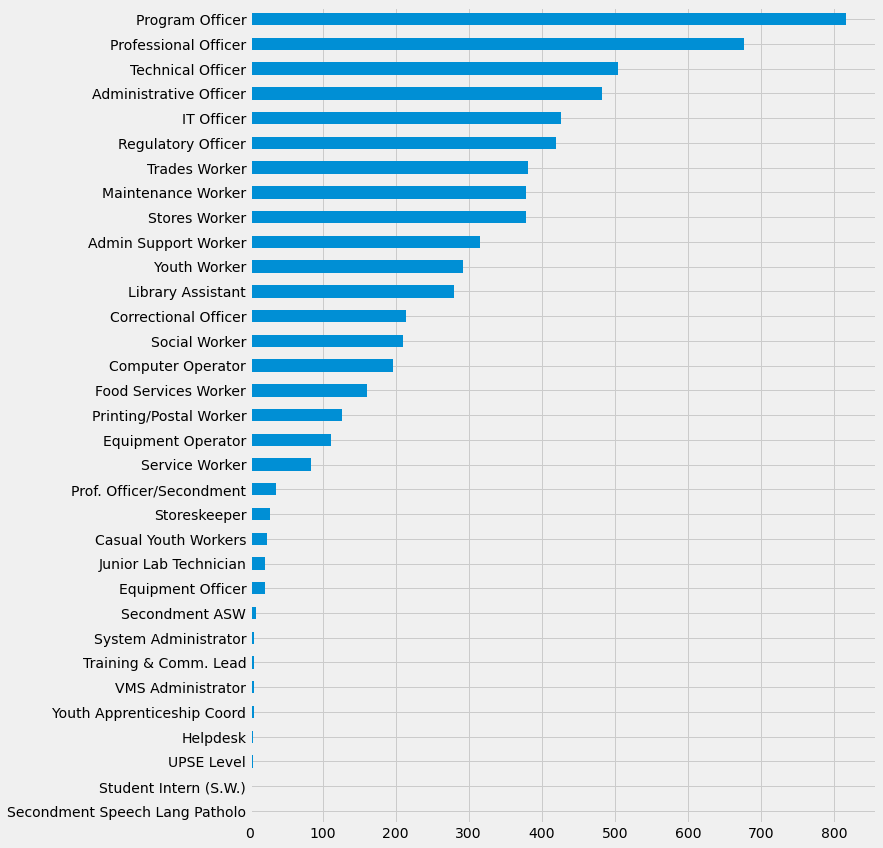

In [9]:
# Plot the Job Classification counts on a bar chart.
jc_count = df['Job Classification'].value_counts()
jc_count.plot.barh(figsize=(10, 14)).invert_yaxis()

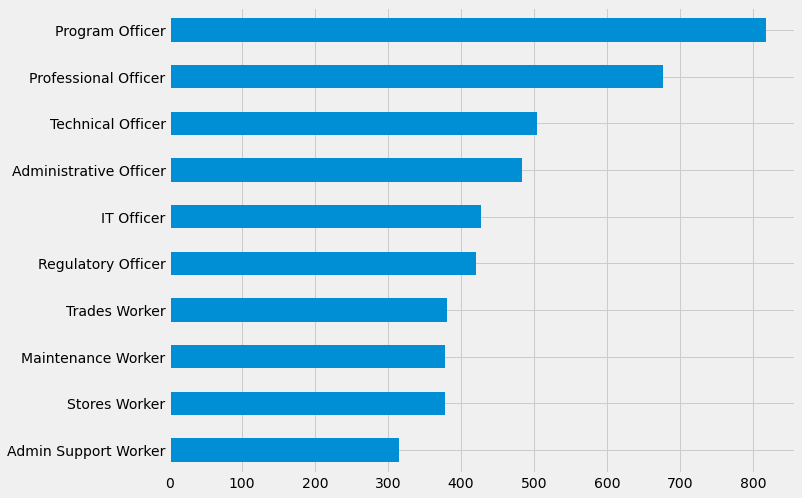

In [10]:
# And just the top 10.
jc_count[:10].plot.barh(figsize=(10, 8)).invert_yaxis()

In [11]:
# Save the updated DataFrame - with the Job Classification replacements.
df.to_csv('../resources/transformed_data/OD0052_JC_Transformed.csv')